In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
from numpy import array
import numpy.polynomial.polynomial as poly
import pandas as pd
import datetime as dt
# import seaborn
import matplotlib.pylab as plt
import os
import random
import shutil
import glob
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, LSTM
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.metrics import categorical_crossentropy
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## We did data imputation as we converted string into datetime for ml

## Feature labels
Date will be our X value to train which will predict our close which is y

In [3]:
# seaborn.set(rc={'figure.figsize':(16,8.27)})

In [4]:
df = pd.read_csv('indexData.csv')

In [5]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [6]:
df.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

### we are converting string to actual datetime

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

### we will check for the NASDAQ

In [8]:
df_IXIC = df[df["Index"].isin(['IXIC'])].sort_values('Date')

In [9]:
df_IXIC

,Index,Date,Open,High,Low,Close,Adj Close,Volume
13948,IXIC,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000e+00
13949,IXIC,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0.000000e+00
13950,IXIC,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0.000000e+00
13951,IXIC,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0.000000e+00
13952,IXIC,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0.000000e+00
...,...,...,...,...,...,...,...,...
26633,IXIC,2021-05-24,13557.209960,13708.849610,13551.009770,13661.169920,13661.169920,3.490650e+09
26634,IXIC,2021-05-25,13721.540040,13751.139650,13631.799810,13657.169920,13657.169920,4.084480e+09
26635,IXIC,2021-05-26,13693.940430,13750.160160,13679.589840,13738.000000,13738.000000,4.231140e+09
26636,IXIC,2021-05-27,13742.589840,13776.519530,13701.629880,13736.280270,13736.280270,5.057550e+09


### So our total data for IXIC is

In [11]:
df_IXIC_data_close = df_IXIC[["Date","Close"]]

In [12]:
df_IXIC_data_close

,Date,Close
13948,1971-02-05,100.000000
13949,1971-02-08,100.839996
13950,1971-02-09,100.760002
13951,1971-02-10,100.690002
13952,1971-02-11,101.449997
...,...,...
26633,2021-05-24,13661.169920
26634,2021-05-25,13657.169920
26635,2021-05-26,13738.000000
26636,2021-05-27,13736.280270


In [13]:
df_IXIC_data_close.isnull().sum()

Date     0
Close    0
dtype: int64

### Again Checking to make sure if there is non value and we just drop it

In [15]:
df_IXIC_data_close_withoutnan = df_IXIC_data_close.dropna()

### final proof

In [16]:
df_IXIC_data_close_withoutnan.isnull().sum()

Date     0
Close    0
dtype: int64

# Our part

In [81]:
df_IXIC_data_close_withoutnan.Date = df_IXIC_data_close_withoutnan.Date.map(dt.datetime.toordinal)

TypeError: descriptor 'toordinal' for 'datetime.date' objects doesn't apply to a 'int' object

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df_IXIC_data_close_withoutnan['Date'], df_IXIC_data_close_withoutnan['Close'], test_size=0.3, random_state=42)

In [87]:
X_train

26421    737627
21424    730370
21177    730013
21529    730523
17096    724116
          ...  
25912    736887
19139    727066
19338    727354
14808    720809
21218    730070
Name: Date, Length: 8883, dtype: int64

In [88]:
type(X_train)

pandas.core.series.Series

In [89]:
X_train = X_train[:, np.newaxis]

C:\Users\SulabhShrestha\AppData\Local\Temp\ipykernel_16740\2404535186.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]


In [90]:
type(X_train)

numpy.ndarray

In [91]:
linear_reg = LinearRegression().fit(X_train, y_train)

In [92]:
X_test = X_test[:, np.newaxis]

C:\Users\SulabhShrestha\AppData\Local\Temp\ipykernel_16740\4169426711.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]


In [93]:
pred_lr = linear_reg.predict(X_test)

In [94]:
len(pred_lr)

3807

In [95]:
len(y_test)

3807

In [96]:
mse = mean_squared_error(y_test, pred_lr)

In [97]:
mse

2251228.1939363847

In [98]:
print("Coefficient of determination: %.2f" % r2_score(y_test, pred_lr))

Coefficient of determination: 0.64


In [ ]:
model_rf

In [99]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(y_test, pred_lr)
print(f"The mean absolute error of the optimal model is {model_error:.2f} ")

The mean absolute error of the optimal model is 1055.07 


## Decision Tree

In [117]:
from sklearn.metrics import accuracy_score

In [112]:
tree = DecisionTreeRegressor(criterion='mse',max_depth=25).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

C:\Users\SulabhShrestha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [115]:
mse = mean_squared_error(y_test, pred_tree)
mse

2102.9631321423763

In [113]:
print("Coefficient of determination: %.2f" % r2_score(y_test, pred_tree))

Coefficient of determination: 1.00


## Trying Random forest

In [100]:
model_rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [101]:
pred_model_rf = model_rf.predict(X_test)


In [102]:
mse = mean_squared_error(y_test, pred_model_rf)

In [103]:
mse

1565.913824876823

In [104]:
print("Coefficient of determination: %.2f" % r2_score(y_test, pred_model_rf))

Coefficient of determination: 1.00


In [137]:
len(pred_model_rf)

3807

In [142]:
sample_sequence = list(range(1, 3808, 1))


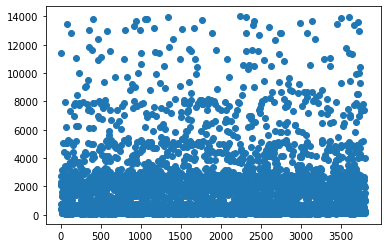

In [144]:
plt.scatter(sample_sequence, pred_model_rf)

In [138]:
len(y_test)

3807

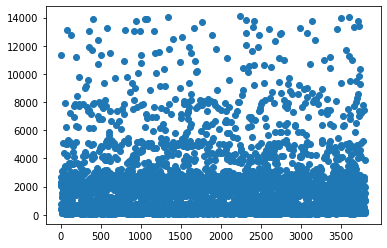

In [145]:
plt.scatter(sample_sequence, y_test)

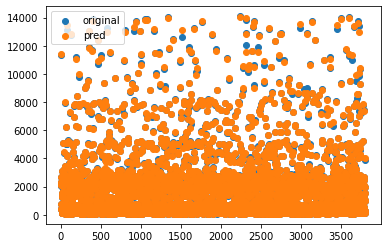

In [146]:
# # Comparing
plt.scatter(sample_sequence, y_test, label="original")
plt.scatter(sample_sequence, pred_model_rf, label="pred")
plt.legend()

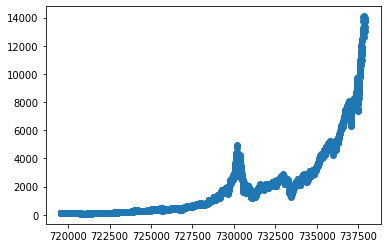

In [131]:
plt.scatter(X_test, y_test, label='GT')

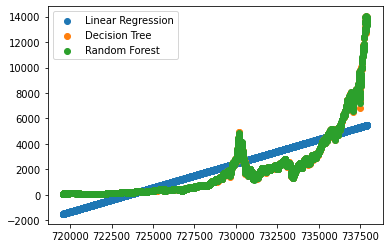

In [132]:
# plt.scatter(y_test, X_test, label='GT')
plt.scatter(X_test,pred_lr,label='Linear Regression')
plt.scatter(X_test,pred_tree,label='Decision Tree')
plt.scatter(X_test,pred_model_rf,label='Random Forest')
plt.legend()

In [107]:
model_error = mean_absolute_error(y_test, pred_model_rf)
print(f"The mean absolute error of the optimal model is {model_error:.2f} ")

The mean absolute error of the optimal model is 17.20 


In [31]:
# 5000 either it will give +-6218/4218
# Reference: https://inria.github.io/scikit-learn-mooc/python_scripts/linear_regression_in_sklearn.html

# Our part

In [26]:
data_train = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date < "2010-01-01"]
data_test = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date >= "2010-01-01"]

In [27]:
data_train

,Date,Close
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
11072,2009-12-24,7255.000000
11073,2009-12-28,7261.240234
11074,2009-12-29,7252.189941
11075,2009-12-30,7241.240234


In [28]:
data_train.Date = data_train.Date.map(dt.datetime.toordinal)

C:\Users\SulabhShrestha\AppData\Local\Temp\ipykernel_13732\1826644791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.Date = data_train.Date.map(dt.datetime.toordinal)


In [51]:
X_train = data_train.Date[:, np.newaxis]

C:\Users\SulabhShrestha\AppData\Local\Temp\ipykernel_13732\767744527.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.Date[:, np.newaxis]


In [52]:
X_train

array([[717701],
       [717704],
       [717705],
       ...,
       [733770],
       [733771],
       [733772]], dtype=int64)

In [53]:
type(X_train)

numpy.ndarray

In [31]:
y_train = data_train.Close

In [32]:
y_train.isnull().sum()

0

In [33]:
tree = DecisionTreeRegressor(criterion='mse',max_depth=50).fit(X_train, y_train)

C:\Users\SulabhShrestha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [34]:
linear_reg = LinearRegression().fit(X_train, y_train)

In [35]:
model_rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [36]:
X_all = df_NYA_data_close_withoutnan.Date.map(dt.datetime.toordinal)[:, np.newaxis]

C:\Users\SulabhShrestha\AppData\Local\Temp\ipykernel_13732\4274694353.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = df_NYA_data_close_withoutnan.Date.map(dt.datetime.toordinal)[:, np.newaxis]


In [37]:
X_all

array([[717701],
       [717704],
       [717705],
       ...,
       [737936],
       [737937],
       [737938]], dtype=int64)

In [38]:
np.where(df_NYA_data_close_withoutnan['Date'] == '1966-01-05')[0]

array([3], dtype=int64)

In [39]:
X_all[3]

array([717706], dtype=int64)

In [40]:
pred_tree = tree.predict(X_all)
pred_model_rf = model_rf.predict(X_all)
pred_lr = linear_reg.predict(X_all)
X = np.array(data_train.Date)
y = np.array(data_train.Close)
model_coef_polyfit = poly.polyfit(X, y, 3)
X_new = np.array(df_NYA_data_close_withoutnan.Date.map(dt.datetime.toordinal))
ffit = poly.polyval(X_new, model_coef_polyfit)
X_new = pd.DataFrame(X_new,columns=['Date'])
X_new = X_new.Date.map(dt.datetime.fromordinal)

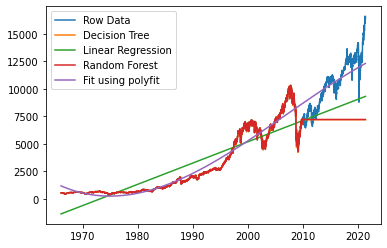

In [41]:
plt.plot(df_NYA_data_close_withoutnan.Date,df_NYA_data_close_withoutnan.Close,label='Row Data')
plt.plot(df_NYA_data_close_withoutnan.Date,pred_tree,label='Decision Tree')
plt.plot(df_NYA_data_close_withoutnan.Date,pred_lr,label='Linear Regression')
plt.plot(df_NYA_data_close_withoutnan.Date,pred_model_rf,label='Random Forest')
plt.plot(X_new,ffit,label='Fit using polyfit')
plt.legend()

In [42]:
tree.score(X_all,df_NYA_data_close_withoutnan.Close)

0.7973522670100477

In [43]:
linear_reg.score(X_all,df_NYA_data_close_withoutnan.Close)

0.8281145573435111

In [44]:
model_rf.score(X_all,df_NYA_data_close_withoutnan.Close)

0.7985765220705747

In [41]:
df_N100 = df[df["Index"].isin(['N100'])].sort_values('Date')

In [42]:
new_index = np.arange(0,len(df_N100.Close),1)

In [43]:
len(df_N100.Close)

5507

In [44]:
df_N100_data_close = df_N100[["Date","Close"]]
df_N100_data_close

,Date,Close
106950,1999-12-31,1000.000000
106951,2000-01-03,996.770020
106952,2000-01-04,955.969971
106953,2000-01-05,930.260010
106954,2000-01-06,922.460022
...,...,...
112452,2021-05-27,1247.069946
112453,2021-05-28,1256.599976
112454,2021-05-31,1248.930054
112455,2021-06-01,1258.579956


In [45]:
df_N100_data_close.index

Int64Index([106950, 106951, 106952, 106953, 106954, 106955, 106956, 106957,
            106958, 106959,
            ...
            112447, 112448, 112449, 112450, 112451, 112452, 112453, 112454,
            112455, 112456],
           dtype='int64', length=5507)

In [46]:
df_N100_data_close.isnull().sum()

Date      0
Close    33
dtype: int64

In [47]:
df_N100_data_close_withoutnan = df_N100_data_close.dropna()

In [48]:
len(df_N100_data_close_withoutnan.Close)

5474

In [49]:
df_N100_data_close_withoutnan.isnull().sum()

Date     0
Close    0
dtype: int64

In [50]:
data_train_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date < "2015-01-01"]
data_test_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date >= "2015-01-01"]

In [51]:
df_N100_data_close_withoutnan.index

Int64Index([106950, 106951, 106952, 106953, 106954, 106955, 106956, 106957,
            106958, 106959,
            ...
            112447, 112448, 112449, 112450, 112451, 112452, 112453, 112454,
            112455, 112456],
           dtype='int64', length=5474)

In [52]:
data_train_N100.Date = data_train_N100.Date.map(dt.datetime.toordinal)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
data_train_N100.Close

106950    1000.000000
106951     996.770020
106952     955.969971
106953     930.260010
106954     922.460022
             ...     
110811     846.840027
110812     843.859985
110813     846.969971
110814     834.340027
110815     839.520020
Name: Close, Length: 3834, dtype: float64

In [54]:
X_train_N100 = data_train_N100.Date[:, np.newaxis]
y_train_N100 = data_train_N100.Close

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [55]:
tree_N100 = DecisionTreeRegressor(criterion='mse',max_depth=50).fit(X_train_N100, y_train_N100)
linear_reg_N100 = LinearRegression().fit(X_train_N100, y_train_N100)
model_rf_N100 = RandomForestRegressor(n_estimators=10).fit(X_train_N100, y_train_N100)

In [56]:
X_all_N100 = df_N100_data_close_withoutnan.Date.map(dt.datetime.toordinal)[:, np.newaxis]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [57]:
pred_tree_N100 = tree_N100.predict(X_all_N100)
pred_lr_N100 = linear_reg_N100.predict(X_all_N100)
pred_model_rf_N100 = model_rf_N100.predict(X_all_N100)

In [58]:
X_N100 = np.array(data_train_N100.Date)
y_N100 = np.array(data_train_N100.Close)
model_coef_polyfit = poly.polyfit(X_N100, y_N100, 2)
X_new_N100 = np.array(df_N100_data_close_withoutnan.Date.map(dt.datetime.toordinal))
ffit_N100 = poly.polyval(X_new_N100, model_coef_polyfit)
X_new_N100 = pd.DataFrame(X_new_N100,columns=['Date'])
X_new_N100 = X_new_N100.Date.map(dt.datetime.fromordinal)

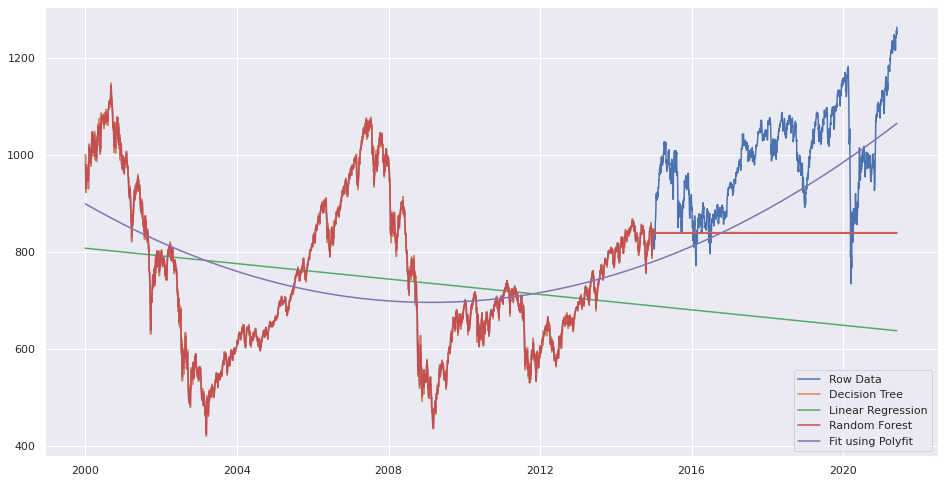

In [59]:
plt.plot(df_N100_data_close_withoutnan.Date,df_N100_data_close_withoutnan.Close,label='Row Data')
plt.plot(df_N100_data_close_withoutnan.Date,pred_tree_N100,label='Decision Tree')
plt.plot(df_N100_data_close_withoutnan.Date,pred_lr_N100,label='Linear Regression')
plt.plot(df_N100_data_close_withoutnan.Date,pred_model_rf_N100,label='Random Forest')
plt.plot(X_new_N100,ffit_N100,label='Fit using Polyfit')
plt.legend()